# Projeto 1 "Online Retail"

Data Set disponibilizado pela UC Irvine Macbine Leaning Repository em https://archive.ics.uci.edu/dataset/352/online+retail

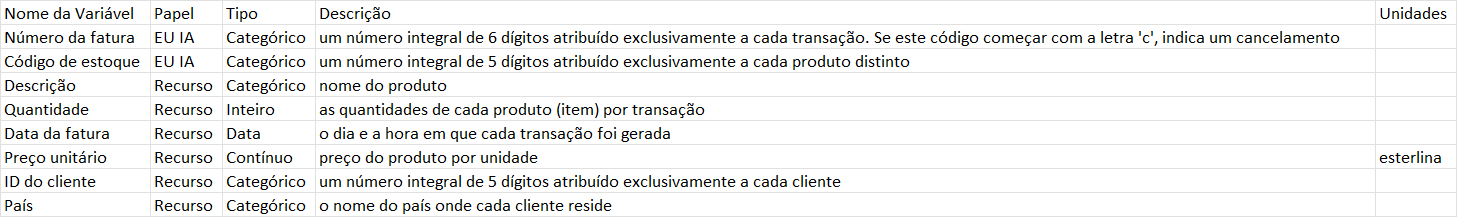

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importação de dados
df = pd.read_excel("C:\\Users\\geral\\Desktop\\JUPITER\\online-retail\\Online-Retail.xlsx")

In [3]:
#Vizualiação tipos de dados
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
#Vizualização data frame
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#Percentual de NA's
((len(df) / df.count())-1).round(3)

InvoiceNo      0.000
StockCode      0.000
Description    0.003
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID     0.332
Country        0.000
dtype: float64

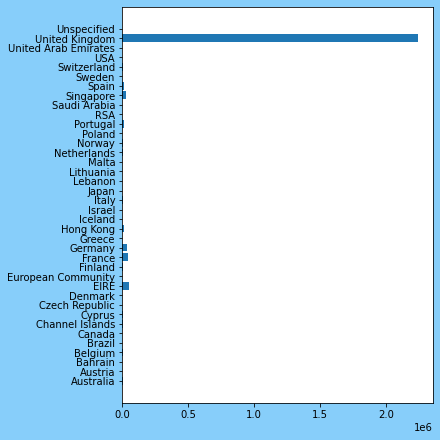

In [50]:
lista_maior = df.groupby('Country')['UnitPrice'].sum().astype(int) / df.UnitPrice.sum().astype(int)

In [80]:
lista_maior.sort_values(['Country','UnitPrice'],ascending=False)

TypeError: unhashable type: 'list'